<a href="https://colab.research.google.com/github/Gilf641/EVA4/blob/master/S11/S11_Assignment(89.10%25).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mount your G-Drive**

In [1]:
from __future__ import print_function
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Add Library Path in your def search path**

In [2]:
import sys
sys.path.append('/content/drive/My Drive/EVA4/updLib2/evaLibrary')
!ls '/content/drive/My Drive/EVA4/updLib2/evaLibrary'

AlbTestTransforms.py   customNet.py    execute.py    resNet.py
AlbTrainTransforms.py  cyclicLR.py     Gradcam.py    rohan_library.py
albumentations.py      DataLoaders.py  LR_Finder.py
all.py		       displayData.py  __pycache__


In [0]:
# !pip install torch-lr-finder -v --global-option="amp"

**Import required libraries**

In [4]:
from rohan_library import *
import execute
from resNet import ResNet18
import displayData as display
import Gradcam as gdc
import albumentations as alb
import DataLoaders as loader
import AlbTestTransforms
import AlbTrainTransforms
import LR_Finder as lrf
import cyclicLR as clr
import customNet

  pip install torch-lr-finder -v --global-option="amp"


**Albumentations**

In [0]:
albTrain = AlbTrainTransforms.train_transforms()
albTest = AlbTestTransforms.test_transforms()

**Load the Datasets**

In [6]:
train = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = albTrain)
test = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = albTest)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


**DataLoader for Train & Test Dataset**

In [0]:
dl = loader.DataLoaders(batch_size=512)
trainLoader = dl.dataLoader(train)
testLoader = dl.dataLoader(test)


In [8]:
dataiter = iter(trainLoader)

images, labels = dataiter.next()
print(images.shape)
print(labels.shape)

torch.Size([512, 3, 32, 32])
torch.Size([512])


**Displaying Random Images**

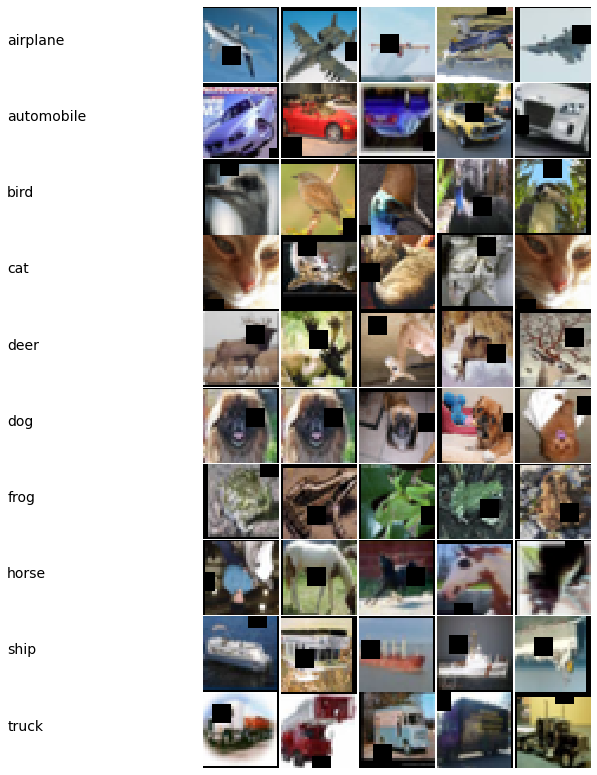

In [9]:
display.class_images(trainLoader)


**CustomNet**

In [10]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')
print('Device set to ', device)

model = customNet.main11().to(device)
summary(model, input_size=(3,32,32))

Device set to  cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,856
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
           Conv2d-10          [-1, 128, 16, 16]         147,456
      BatchNorm2d-11          [-1, 128, 16, 16]             256
       BasicBlock-12          [-1, 128, 16, 16]               0
           Conv2d-13          [-1, 256, 16, 16]         295,168
        MaxPool2d-1

/content/drive/My Drive/EVA4/updLib2/evaLibrary/customNet.py:122: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(outX)


**LR Finder**

In [11]:
# criterion = execute.cross_entropy_loss()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-7, weight_decay=1e-2)
lr_finder = lrf.LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainLoader, end_lr=100, num_iter=100, step_mode="exp")

/content/drive/My Drive/EVA4/updLib2/evaLibrary/customNet.py:122: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(outX)


The loss has diverged, Stopping Early!


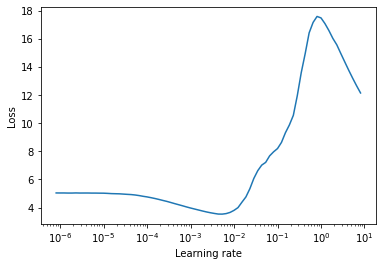

In [12]:
lr_finder.plot()

In [0]:
lr_finder.reset()

**Cyclic Learning Rate Range Test**

/content/drive/My Drive/EVA4/updLib2/evaLibrary/customNet.py:122: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(outX)


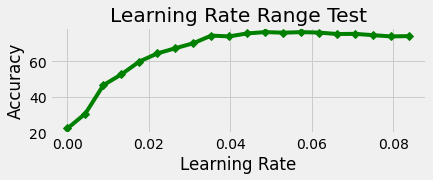

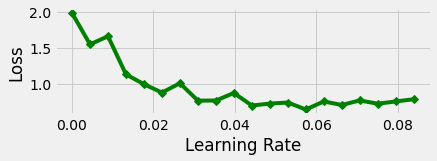

In [14]:
clr.lr_rangetest(device, model, trainLoader, criterion, 0.0001, 0.001, 20)

**Cyclic LR Plot**

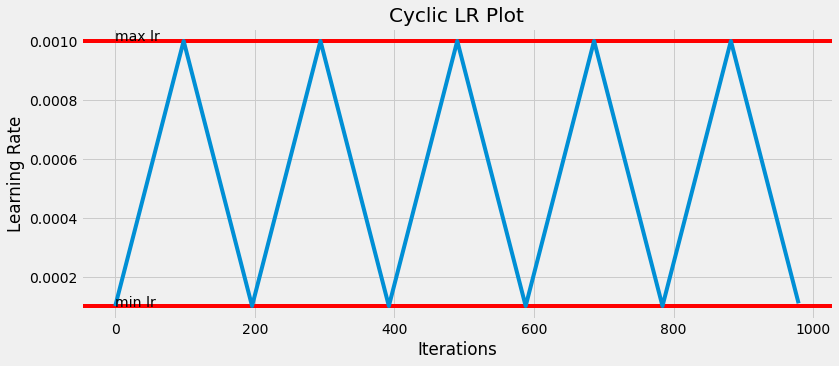

In [15]:
clr1 = clr.CyclicLR(0.001, 0.0001, len(trainLoader), len(trainLoader)*10)
clr1.cyclic_lr(plotGraph=True)

**Modelling**

In [36]:
incorrectSamples = []
correctSamples = []
correctLabels = []
learningRates = []
model = customNet.main11().to(device)
EPOCHS = 24

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum=0.95, nesterov = True) 
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr = 0.038, total_steps=2400, epochs = 24, steps_per_epoch=len(trainLoader),
                                                pct_start=5/EPOCHS, anneal_strategy='linear', cycle_momentum=False, 
                                                base_momentum=0.85, max_momentum=0.95, div_factor=23)



model1 = execute.Test_Train(model, device, optimizer, scheduler, criterion)



for epoch in range(1, EPOCHS+1):
  print('EPOCH: ',epoch)
  model1.train(trainLoader, epoch)#, L1lambda=1e-5)
  scheduler.step()
  model1.test(testLoader, 'model1.pt', correctSamples, correctLabels, incorrectSamples)
  for param_group in optimizer.param_groups:
    print('Learning Rate = {a} for EPOCH {e}'.format(a = round(param_group['lr'],5), e=epoch+1))
    learningRates.append(param_group['lr'])

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH:  1


/content/drive/My Drive/EVA4/updLib2/evaLibrary/customNet.py:122: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(outX)
Loss=1.5421003103256226 Batch_id=97 Accuracy=33.44: 100%|██████████| 98/98 [00:16<00:00,  5.99it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 1.9427).  Saving model ...

Test set: Average loss: 1.9427, Accuracy: 4118/10000 (41.18%)

Learning Rate = 0.00886 for EPOCH 2
EPOCH:  2


Loss=1.3385869264602661 Batch_id=97 Accuracy=50.09: 100%|██████████| 98/98 [00:16<00:00,  5.96it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Validation loss has  decreased (1.9427 --> 1.3613).  Saving model ...

Test set: Average loss: 1.3613, Accuracy: 5606/10000 (56.06%)

Learning Rate = 0.01607 for EPOCH 3
EPOCH:  3


Loss=1.1763660907745361 Batch_id=97 Accuracy=59.14: 100%|██████████| 98/98 [00:16<00:00,  5.94it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.5283, Accuracy: 5873/10000 (58.73%)

Learning Rate = 0.02329 for EPOCH 4
EPOCH:  4


Loss=1.210790991783142 Batch_id=97 Accuracy=63.84: 100%|██████████| 98/98 [00:16<00:00,  5.88it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Validation loss has  decreased (1.3613 --> 1.2312).  Saving model ...

Test set: Average loss: 1.2312, Accuracy: 6632/10000 (66.32%)

Learning Rate = 0.0305 for EPOCH 5
EPOCH:  5


Loss=0.8830651640892029 Batch_id=97 Accuracy=69.08: 100%|██████████| 98/98 [00:16<00:00,  5.94it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Validation loss has  decreased (1.2312 --> 1.1255).  Saving model ...

Test set: Average loss: 1.1255, Accuracy: 7035/10000 (70.35%)

Learning Rate = 0.03771 for EPOCH 6
EPOCH:  6


Loss=0.7956579923629761 Batch_id=97 Accuracy=73.27: 100%|██████████| 98/98 [00:16<00:00,  5.90it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Validation loss has  decreased (1.1255 --> 0.6650).  Saving model ...

Test set: Average loss: 0.6650, Accuracy: 7466/10000 (74.66%)

Learning Rate = 0.0361 for EPOCH 7
EPOCH:  7


Loss=0.7504936456680298 Batch_id=97 Accuracy=76.43: 100%|██████████| 98/98 [00:16<00:00,  5.88it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Validation loss has  decreased (0.6650 --> 0.6174).  Saving model ...

Test set: Average loss: 0.6174, Accuracy: 7610/10000 (76.10%)

Learning Rate = 0.03412 for EPOCH 8
EPOCH:  8


Loss=0.6750540137290955 Batch_id=97 Accuracy=79.04: 100%|██████████| 98/98 [00:16<00:00,  5.93it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Validation loss has  decreased (0.6174 --> 0.5145).  Saving model ...

Test set: Average loss: 0.5145, Accuracy: 7960/10000 (79.60%)

Learning Rate = 0.03214 for EPOCH 9
EPOCH:  9


Loss=0.4930884540081024 Batch_id=97 Accuracy=80.89: 100%|██████████| 98/98 [00:16<00:00,  5.95it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Validation loss has  decreased (0.5145 --> 0.4944).  Saving model ...

Test set: Average loss: 0.4944, Accuracy: 8130/10000 (81.30%)

Learning Rate = 0.03016 for EPOCH 10
EPOCH:  10


Loss=0.4290955066680908 Batch_id=97 Accuracy=82.63: 100%|██████████| 98/98 [00:16<00:00,  5.94it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Validation loss has  decreased (0.4944 --> 0.4393).  Saving model ...

Test set: Average loss: 0.4393, Accuracy: 8278/10000 (82.78%)

Learning Rate = 0.02818 for EPOCH 11
EPOCH:  11


Loss=0.4779258072376251 Batch_id=97 Accuracy=84.03: 100%|██████████| 98/98 [00:16<00:00,  5.92it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4509, Accuracy: 8155/10000 (81.55%)

Learning Rate = 0.0262 for EPOCH 12
EPOCH:  12


Loss=0.5182872414588928 Batch_id=97 Accuracy=85.05: 100%|██████████| 98/98 [00:16<00:00,  5.79it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5152, Accuracy: 8411/10000 (84.11%)

Learning Rate = 0.02422 for EPOCH 13
EPOCH:  13


Loss=0.4825555682182312 Batch_id=97 Accuracy=85.97: 100%|██████████| 98/98 [00:16<00:00,  5.85it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5409, Accuracy: 8505/10000 (85.05%)

Learning Rate = 0.02224 for EPOCH 14
EPOCH:  14


Loss=0.4070374071598053 Batch_id=97 Accuracy=86.92: 100%|██████████| 98/98 [00:16<00:00,  5.83it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5896, Accuracy: 8398/10000 (83.98%)

Learning Rate = 0.02026 for EPOCH 15
EPOCH:  15


Loss=0.35890164971351624 Batch_id=97 Accuracy=87.92: 100%|██████████| 98/98 [00:16<00:00,  5.89it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Validation loss has  decreased (0.4393 --> 0.4174).  Saving model ...

Test set: Average loss: 0.4174, Accuracy: 8547/10000 (85.47%)

Learning Rate = 0.01828 for EPOCH 16
EPOCH:  16


Loss=0.379831463098526 Batch_id=97 Accuracy=88.77: 100%|██████████| 98/98 [00:16<00:00,  5.92it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4382, Accuracy: 8662/10000 (86.62%)

Learning Rate = 0.0163 for EPOCH 17
EPOCH:  17


Loss=0.24166448414325714 Batch_id=97 Accuracy=89.65: 100%|██████████| 98/98 [00:16<00:00,  5.90it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4636, Accuracy: 8622/10000 (86.22%)

Learning Rate = 0.01432 for EPOCH 18
EPOCH:  18


Loss=0.277815043926239 Batch_id=97 Accuracy=90.19: 100%|██████████| 98/98 [00:16<00:00,  5.96it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5326, Accuracy: 8725/10000 (87.25%)

Learning Rate = 0.01234 for EPOCH 19
EPOCH:  19


Loss=0.25318753719329834 Batch_id=97 Accuracy=91.03: 100%|██████████| 98/98 [00:16<00:00,  5.98it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Validation loss has  decreased (0.4174 --> 0.3464).  Saving model ...

Test set: Average loss: 0.3464, Accuracy: 8767/10000 (87.67%)

Learning Rate = 0.01036 for EPOCH 20
EPOCH:  20


Loss=0.23851560056209564 Batch_id=97 Accuracy=91.58: 100%|██████████| 98/98 [00:16<00:00,  5.94it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4062, Accuracy: 8838/10000 (88.38%)

Learning Rate = 0.00838 for EPOCH 21
EPOCH:  21


Loss=0.3137528896331787 Batch_id=97 Accuracy=92.39: 100%|██████████| 98/98 [00:16<00:00,  5.97it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

Validation loss has  decreased (0.3464 --> 0.3409).  Saving model ...

Test set: Average loss: 0.3409, Accuracy: 8858/10000 (88.58%)

Learning Rate = 0.0064 for EPOCH 22
EPOCH:  22


Loss=0.18668368458747864 Batch_id=97 Accuracy=93.03: 100%|██████████| 98/98 [00:16<00:00,  5.95it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4515, Accuracy: 8823/10000 (88.23%)

Learning Rate = 0.00442 for EPOCH 23
EPOCH:  23


Loss=0.2280641496181488 Batch_id=97 Accuracy=93.67: 100%|██████████| 98/98 [00:16<00:00,  5.91it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3804, Accuracy: 8892/10000 (88.92%)

Learning Rate = 0.00244 for EPOCH 24
EPOCH:  24


Loss=0.1582297831773758 Batch_id=97 Accuracy=94.10: 100%|██████████| 98/98 [00:16<00:00,  6.00it/s]



Test set: Average loss: 0.4722, Accuracy: 8910/10000 (89.10%)

Learning Rate = 0.00046 for EPOCH 25


**Plot Train & Test Curves**

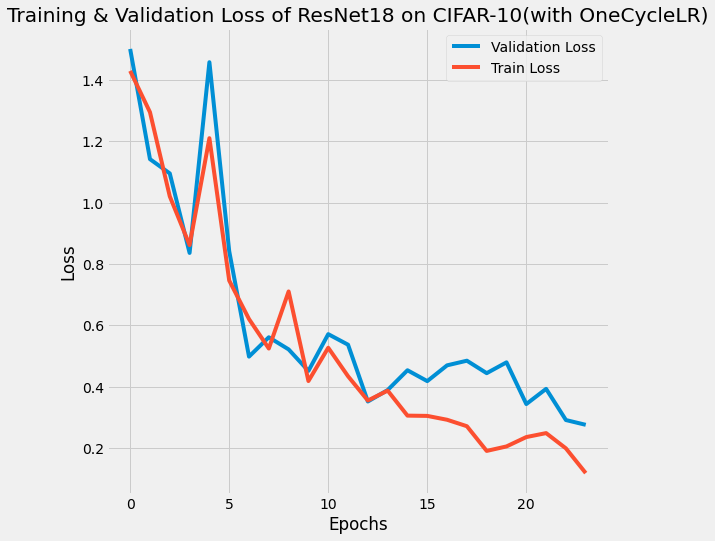

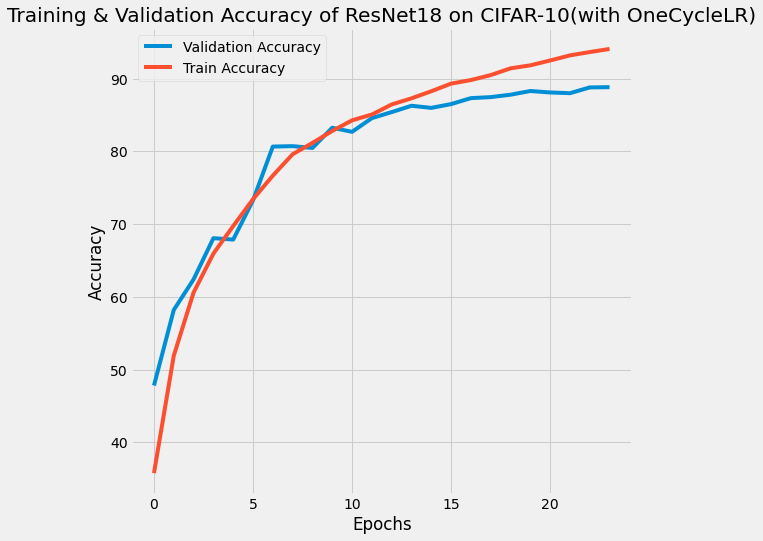

In [17]:
accuracyElements = [(model1.test_acc,"Validation Accuracy"),(model1.train_epoch_end,"Train Accuracy")]
lossElements = [(model1.test_losses,"Validation Loss"),(model1.train_losses,"Train Loss")]

for i in range(1):
  display.plot_curve(lossElements,'Training & Validation Loss of CustomNet on CIFAR-10(with OneCycleLR)', y_label='Loss')
  display.plot_curve(accuracyElements,'Training & Validation Accuracy of CustomNet on CIFAR-10(with OneCycleLR)')


**CLR Plot**

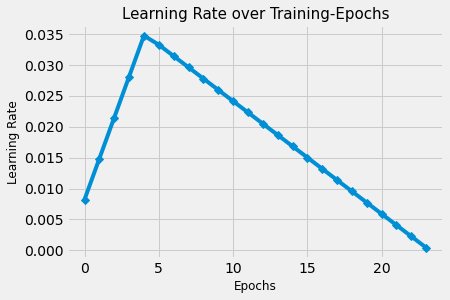

In [32]:
with plt.style.context('fivethirtyeight'):
  plt.plot(learningRates, '-D')
  plt.xlabel('Epochs', fontsize=12)
  plt.ylabel('Learning Rate', fontsize=12)
  plt.title('Learning Rate over Training-Epochs',fontsize=15)

**Misclassified Images**

Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f115cceea90>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 962, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 942, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 124, in join
    res = self._popen.wait(timeout)
  File "/usr/lib/python3.6/multiprocessing/popen_fork.py", line 50, in wait
    return self.poll(os.WNOHANG if timeout == 0.0 else 0)
  File "/usr/lib/python3.6/multiprocessing/popen_fork.py", line 28, in poll
    pid, sts = os.waitpid(self.pid, flag)
KeyboardInterrupt: 


MessageError: ignored

<Figure size 936x936 with 0 Axes>

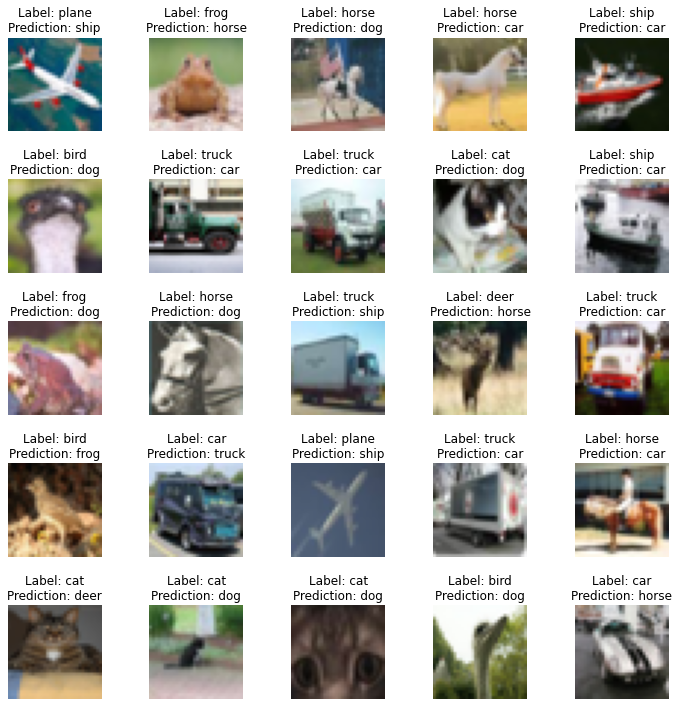

In [33]:
display.misclassified_ones(model, testLoader, incorrectSamples,'MisclassfiedOnes.png')

#GradCam Implementation

**GradCam Input Data**

In [0]:
images = [x['image'] for x in incorrectSamples[10:35]] # Extracting MisClassified Images
target_classes = [l['label'] for l in incorrectSamples[10:35]] # Target Classes
predicted_classes = [p['prediction'] for p in incorrectSamples[10:35]] # Predicted Classes
targetLabels = [classes[t] for t in target_classes] # Target Labels
predLabels = [classes[p] for p in predicted_classes] # Predicted Labels


**GradCam Core** 

IMPLEMENTING GRADCAM FOR SET1[...]
torch.Size([25, 10])
Generating Grad-CAM @layer1
Generating Grad-CAM @layer2
Generating Grad-CAM @layer3
Generating Grad-CAM @layer4


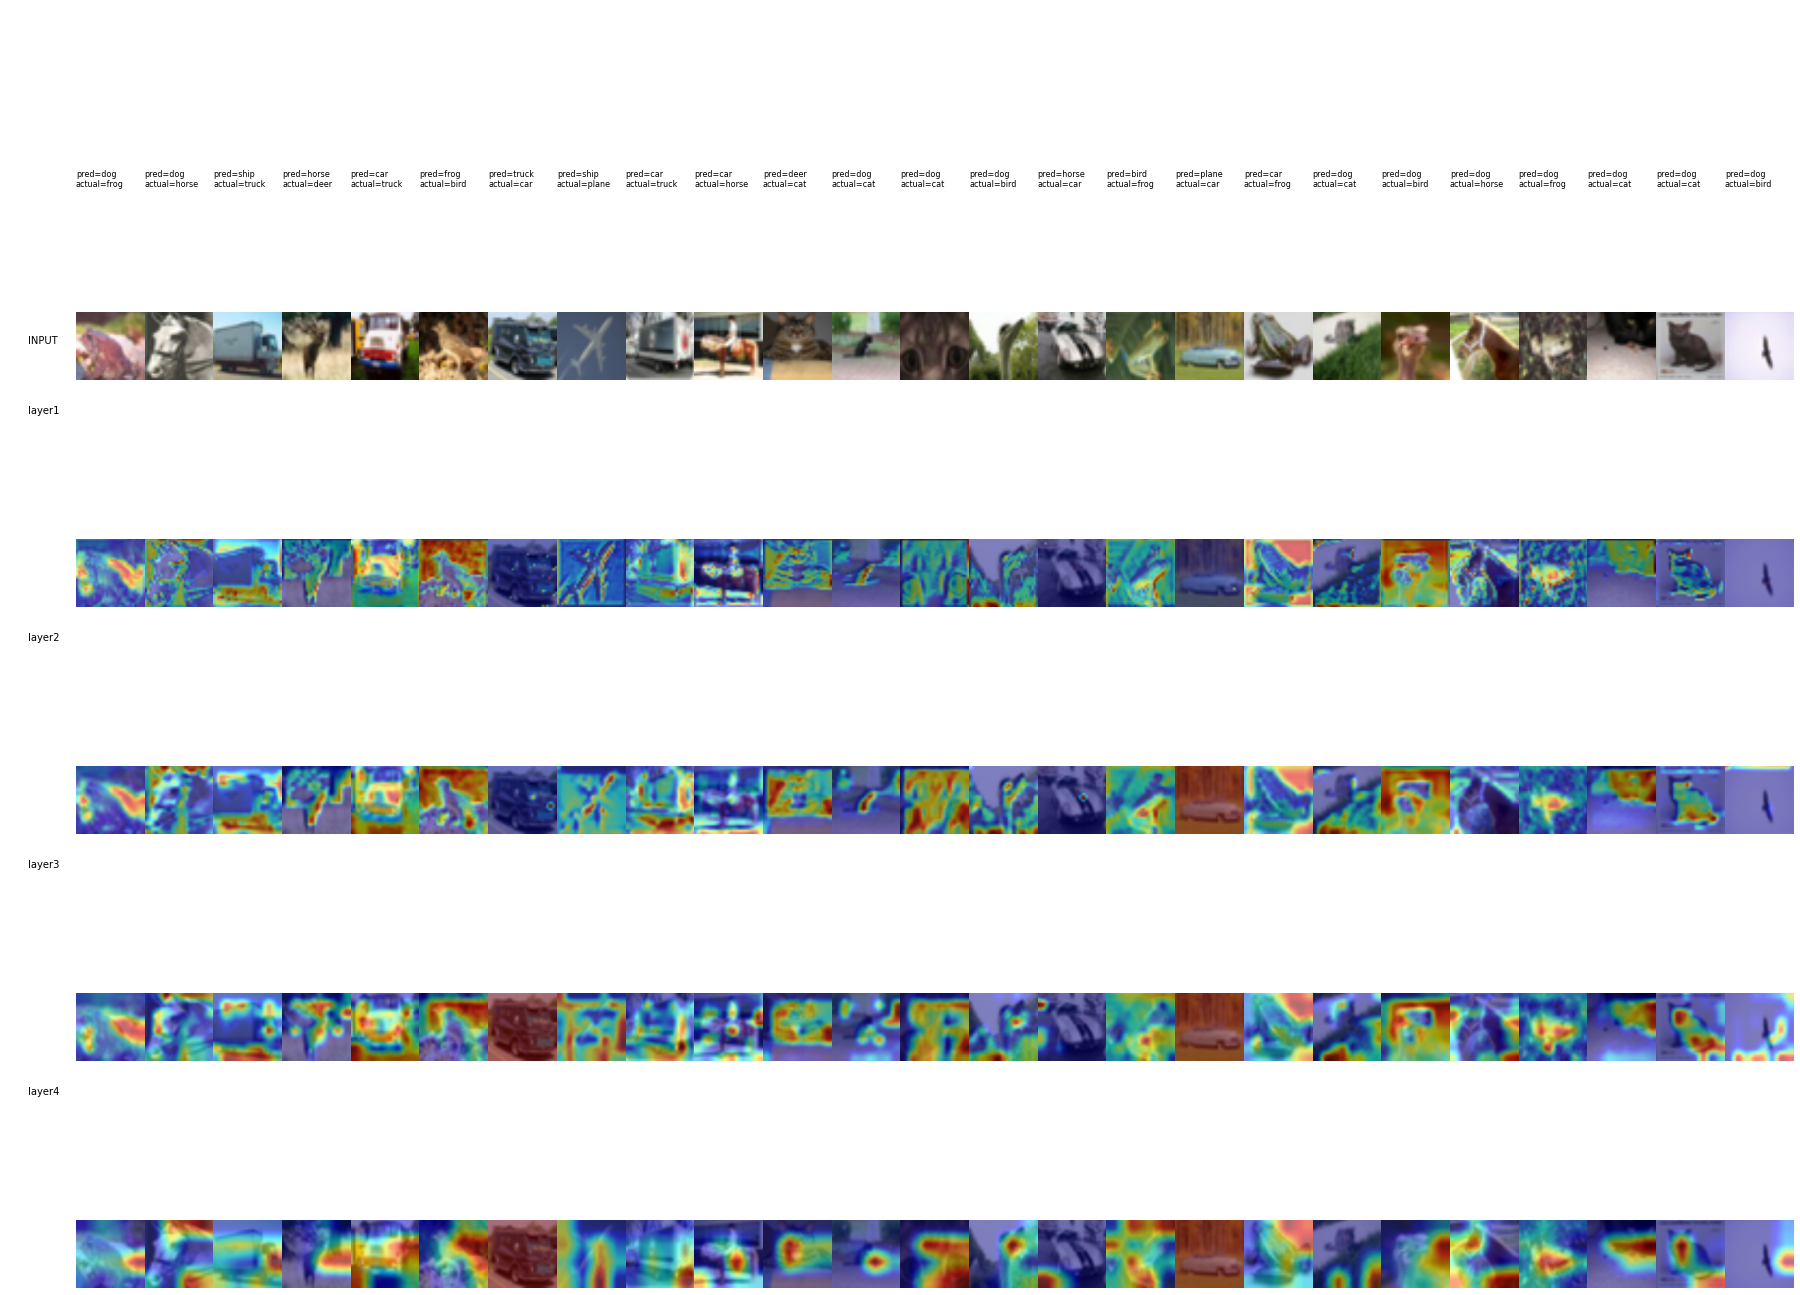

In [35]:
model = ResNet18().to(device)
image_size = (3,32,32) # set image size

target_layers = ["layer1", "layer2", "layer3", "layer4"]
print('IMPLEMENTING GRADCAM FOR SET1[...]')
gradcam_output, probs, predicted_classes = gdc.GRADCAM(images, device, target_classes, model, target_layers) 
gdc.PLOT(gradcam_output, images, target_layers, image_size, display.unnormalize, targetLabels, predLabels) # Plot the gradcam_output for the target layers
